In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.



# Probalility distribution of X of PBH binaries without and with halos for PBHs 
# mass range of m_min M☉ - m_max M☉ .
        
def P_X(m_1, m_2, Δ_1, Δ_2, t_m, X):
    
    if  m_1 < m_min:  
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))

        return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)

    
    
    

In [3]:
def P_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence): 
    
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else: 
    
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


        if DM_halos_presence == 'False':

            # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .


            k_nohalo = 22.3819
            A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

          

            def γ_X(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))

       
            
        else:


            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))



            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))

            
            k_halos = 22.3387
            A_halos = ((ρ_eq**(4/3))*(G**3)*(k_halos**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_halos**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998  *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

          
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21)) * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))


            
        return  (1/(7 * t_m)) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) #* np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 




In [4]:
def P_X_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence): 
    
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else: 
    
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


        if DM_halos_presence == 'False':

            # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .


            k_nohalo = 22.3819
            A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

          

            def γ_X(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))

       
            
        else:


            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))



            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))

            
            k_halos = 22.3387
            A_halos = ((ρ_eq**(4/3))*(G**3)*(k_halos**7))/(c**5)

            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_halos**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998  *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

          
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21)) * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))


            
        return  (1/(7 * t_m)) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 




In [21]:
bin_centres = np.geomspace(2e-2, 78, 16)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 78, 16)
m_2 = np.geomspace(2e-2, 78, 16)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
 
 
    
    
m_1_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78]  
m_2_list = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] 


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5

X = np.geomspace(X_min, X_max, 100000)


m_1 = [0.02, 0.03, 0.06, 0.1, 0.2, 0.3, 0.6, 1, 2, 3, 5, 9, 15, 26, 45, 78] M☉

Δ_1 = [0.0111651, 0.01937612, 0.03362569, 0.05835466, 0.10126977, 0.17574547, 0.30499199, 0.52928885, 0.91853783, 1.59404786, 2.76634068, 4.80075972, 8.33132886, 14.45834503, 25.09128432, 43.54388745]


In [22]:
m_1 = m_1_list[6]           # in units of M☉

Δ_1 = Δ_1_list[6]      

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0]     


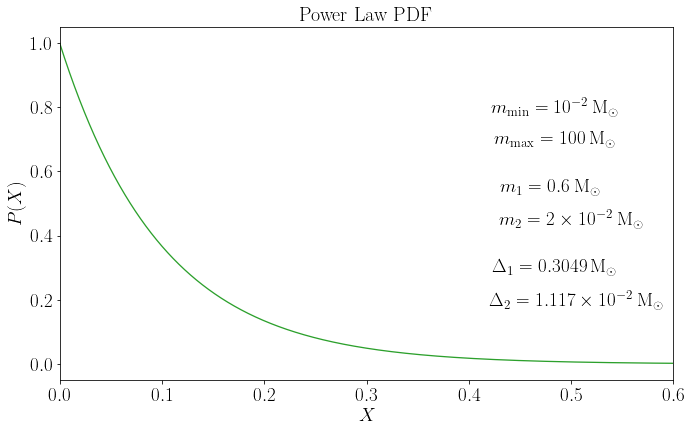

In [35]:
# P(X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 1e-3
f =  0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2     #in units of M☉, for PBHs mass range of 1e-2 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
#plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))   

plt.text(0.4837, 0.8, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.4837, 0.7, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.48, 0.55, "$m_{1} = 0.6 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(0.5, 0.45, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(0.4838, 0.3, r"$\Delta_{1} = 0.3049\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(0.505, 0.2, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")


plt.xlim(0, 0.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title('Power Law PDF ', fontsize = 20)
plt.savefig('1P_X.pdf', bbox_inches = 'tight')
plt.show()

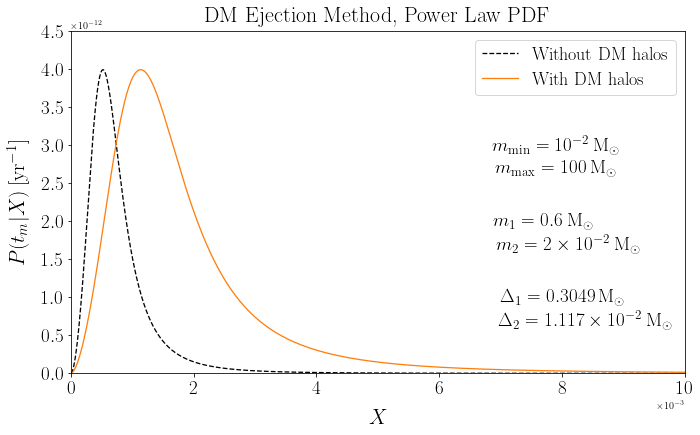

In [54]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.3))


f_pbh= 1e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2  M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')
plt.plot(X, P_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), 'C1')

plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(7.9e-3, 3e-12, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(7.9e-3, 2.7e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(7.7e-3, 2e-12, "$m_{1} = 0.6 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(8.1e-3, 1.7e-12, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(8e-3, 1e-12, r"$\Delta_{1} = 0.3049\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(8.37e-3, 0.7e-12, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 1e-2)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('DM Ejection Method, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2PWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

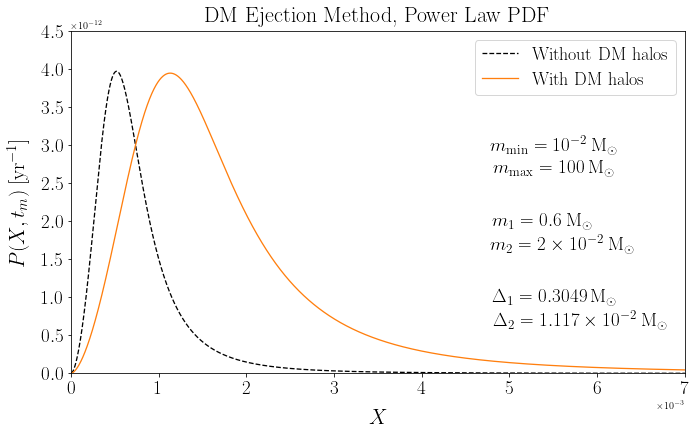

In [67]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.



plt.figure(figsize = (11, 6.3))


f_pbh= 1e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_X_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')
plt.plot(X, P_X_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), 'C1')

plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(5.51e-3, 3e-12, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5.51e-3, 2.7e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5.37e-3, 2e-12, "$m_{1} = 0.6 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(5.6e-3, 1.7e-12, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(5.51e-3, 1e-12, r"$\Delta_{1} = 0.3049\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5.8e-3, 0.7e-12, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 7e-3)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('DM Ejection Method, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2PWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

In [69]:
m_1 = m_1_list[-1]           # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_2_list[0]             # in units of M☉
 
Δ_2 = Δ_2_list[0] 

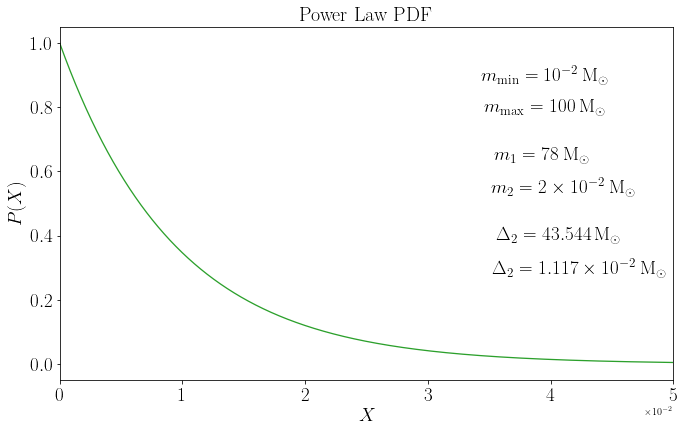

In [70]:
# P(X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


f_pbh = 1e-3
f =  0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2, t_m, X),'C2')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))   



plt.text(3.95e-2, 0.9, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(3.95e-2, 0.8, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(3.93e-2, 0.65, "$m_{1} = 78 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(4.1e-2, 0.55, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(4.06e-2, 0.4, r"$\Delta_{2} = 43.544\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(4.23e-2, 0.3, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")






plt.xlim(0, 0.05)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 19)
plt.ylabel('$P(X)$', fontsize = 19)
plt.title(' Power Law PDF ', fontsize = 20)
plt.savefig('2P_X.pdf', bbox_inches = 'tight')
plt.show()

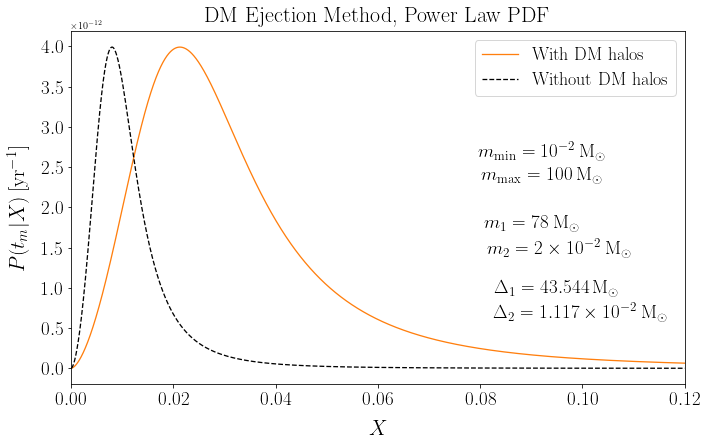

In [71]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.



plt.figure(figsize = (11, 6.5))


f_pbh= 1e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
plt.plot(X, P_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), 'C1')    
plt.plot(X, P_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-1,-2))

plt.text(9.2e-2, 2.7e-12, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(9.2e-2, 2.4e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(9e-2, 1.8e-12, "$m_{1} = 78 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(9.55e-2, 1.5e-12, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(9.5e-2, 1e-12, "$\Delta_{1} = 43.544\: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(9.96e-2, 0.7e-12, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 0.12)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(t_{m}|X) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('DM Ejection Method, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2aPWRP_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

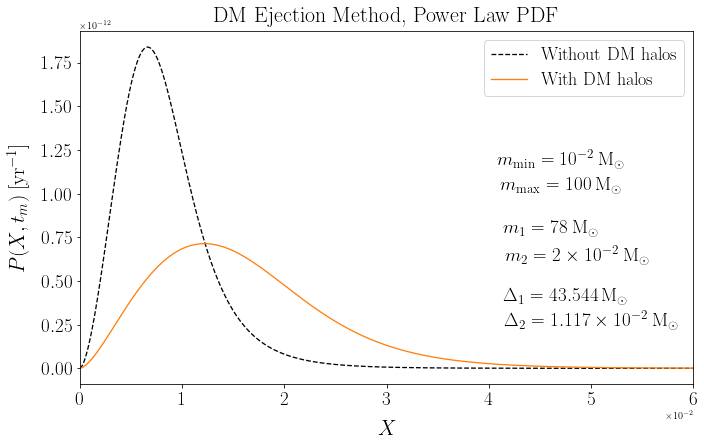

In [72]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))


f_pbh= 1e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-2    #in units of M☉, for PBHs mass range of 1e-2 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
    
plt.plot(X, P_X_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'False'), 'k--')
plt.plot(X, P_X_tm_method_1(m_1, m_2, Δ_1, Δ_2, t_m, X, DM_halos_presence = 'True'), 'C1')

plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,-2))

plt.text(4.7e-2, 1.2e-12, "$m_\mathrm{min} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(4.7e-2, 1.05e-12, "$m_\mathrm{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(4.6e-2, 0.8e-12, "$m_{1} = 78 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(4.86e-2, 0.65e-12, r"$m_{2} = 2 \times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(4.75e-2, 0.415e-12, "$\Delta_{1} =43.544 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(5e-2, 0.275e-12, r"$\Delta_{2} = 1.117\times 10^{-2} \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 6e-2)
#plt.ylim(0, 2.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('DM Ejection Method, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2aPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()